In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [22]:
data = pd.read_csv("./data/compare_history.csv")

data["Address"] = data["Address"].apply(lambda d: d.lower())

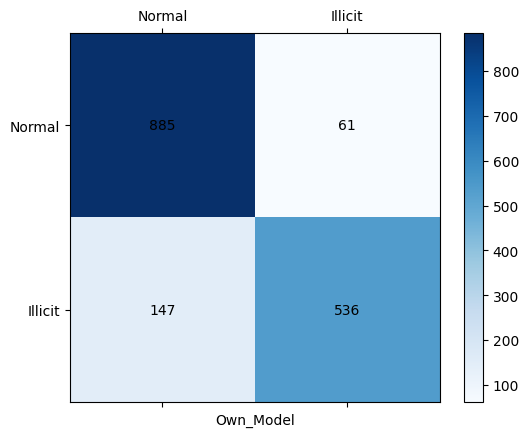

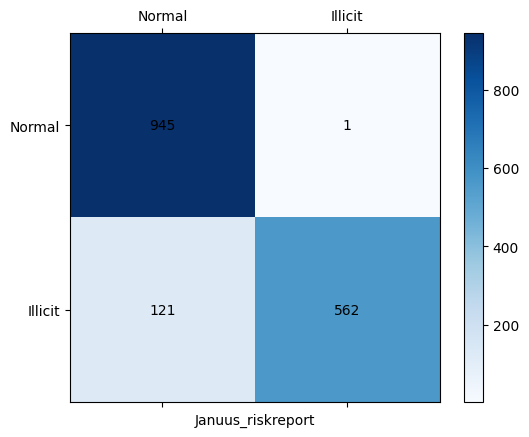

In [23]:
def plot_confusion_matrix(y_true, y_pred, label):
    
    conf_matrix = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    for (i, j), val in np.ndenumerate(conf_matrix):
        ax.text(j, i, f"{val}", ha="center", va="center", color="black")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Normal", "Illicit"])
    ax.set_yticklabels(["Normal", "Illicit"])

    ax.set_xlabel(label)

    plt.show()


plot_confusion_matrix(data["Is_Real_Fraud"], data["Own_Model"], "Own_Model")
plot_confusion_matrix(data["Is_Real_Fraud"], data["Januus_riskreport"], "Januus_riskreport")

## Необходимо рассмотреть доверительный интервал
https://datalearning.ru/index.php/textbook?cid=1&mid=2&topic=4

Для того чтобы рассмотреть доверительные интервал необходимо рассчитать некоторые статистические данные:

Бернуллиевское распределение применяется к экспериментам или наблюдениям, имеющим только два возможных исхода. 
В контексте нашего примера, это могут быть результаты: "Мошенничество" или "Не мошенничество"


Стандартное отклонение (СКО) для Бернуллиевского распределения, где есть только два возможных исхода (например, успех и неудача), вычисляется по формуле:
sqrt(p*(p-1)), где p - вероятность одного из исходов (например, вероятность успеха).

Количество адресов в генеральной совокупности: {1: 4283, 0: 3433}
Количество адресов в выборке: {0: 946, 1: 683}
Вероятности генеральной совокупности [0.55508035 0.44491965]
Вероятности выборки [0.58072437 0.41927563]
Математическое ожидание генеральной совокупности 0.4449196474857439
Математическое ожидание выборки 0.4192756292203806
Дисперсия для мошеннических адресов генеральной совокупности 0.24696615476690528
Дисперсия для мошеннических адресов выборки 0.24348357596223455
Дисперсия для нормальных адресов генеральной совокупности 0.24696615476690525
Дисперсия для нормальных адресов выборки 0.24348357596223455
Доверительный интервал для мошеннических адресов: 0.3953132263818653 < 0.4192756292203806 < 0.4432380320588959
Доверительный интервал для нормальных адресов: 0.5567619679411041 < 0.5807243707796194 < 0.6046867736181346


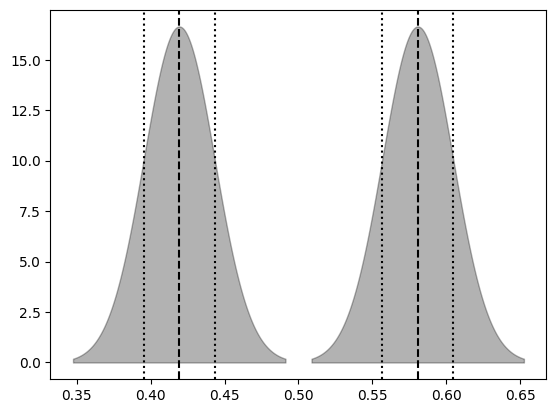

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Загрузка данных
population = pd.read_csv("./data/wallets.csv")
population["Address"] = population["Address"].apply(lambda d: d.lower())

print("Количество адресов в генеральной совокупности:", dict(population["Fraud"].value_counts()))
print("Количество адресов в выборке:", dict(data["Is_Real_Fraud"].value_counts()))

# Вероятности
p_pop = np.array(population["Fraud"].value_counts(normalize=True))
p_data = np.array(data["Is_Real_Fraud"].value_counts(normalize=True))
print("Вероятности генеральной совокупности", p_pop)
print("Вероятности выборки", p_data)

# Математическое ожидание
mean_pop = np.sum(p_pop * np.arange(len(p_pop)))
mean_data = np.sum(p_data * np.arange(len(p_data)))
print("Математическое ожидание генеральной совокупности", mean_pop)
print("Математическое ожидание выборки", mean_data)

# Дисперсия
var_pop_fraud = p_pop[0] * (1 - p_pop[0]) 
var_data_fraud = p_data[1] * (1 - p_data[1])
var_pop_normal = p_pop[1] * (1 - p_pop[1])
var_data_normal = p_data[0] * (1 - p_data[0])
print("Дисперсия для мошеннических адресов генеральной совокупности", var_pop_fraud)
print("Дисперсия для мошеннических адресов выборки", var_data_fraud)
print("Дисперсия для нормальных адресов генеральной совокупности", var_pop_normal)
print("Дисперсия для нормальных адресов выборки", var_data_normal)

n = len(data)  # Размер выборки
t = 1.96  # Значение для 95% доверительного интервала

# Доверительные интервалы для мошеннических и нормальных адресов
margin_error_fraud = t * np.sqrt(var_data_fraud / n)
ci_lower_fraud = p_data[1] - margin_error_fraud
ci_upper_fraud = p_data[1] + margin_error_fraud

margin_error_normal = t * np.sqrt(var_data_normal / n)
ci_lower_normal = p_data[0] - margin_error_normal
ci_upper_normal = p_data[0] + margin_error_normal

print("Доверительный интервал для мошеннических адресов:", f"{ci_lower_fraud} < {p_data[1]} < {ci_upper_fraud}")
print("Доверительный интервал для нормальных адресов:", f"{ci_lower_normal} < {p_data[0]} < {ci_upper_normal}")

# Отображение на графике
# np.linspace генерирует ряд чисел (в данном случае 1000 чисел) равномерно распределённых в заданном интервале.
# p_data[1] — это вероятность мошеннических адресов в вашей выборке 
# margin_error_fraud — это ошибка (или стандартное отклонение) этой вероятности, умноженная на 3. 
# Это делается для того, чтобы охватить большую часть вероятного диапазона значений (обычно 99.7% всех значений, если распределение нормальное), вокруг среднего значения вероятности мошеннических адресов
x_fraud = np.linspace(p_data[1] - 3*margin_error_fraud, p_data[1] + 3*margin_error_fraud, 1000)
# norm.pdf вычисляет значения плотности вероятности (Probability Density Function, PDF) нормального распределения для серии точек.
# x_fraud — это ряд точек для которых вычисляется плотность вероятности. 
# p_data[1] используется как среднее значение (mu) нормального распределения 
# margin_error_fraud — как стандартное отклонение (sigma).
# В результате y_fraud содержит ряд значений плотности вероятности для соответствующих значений из x_fraud, основываясь на нормальном распределении с указанными средним и стандартным отклонением.
y_fraud = norm.pdf(x_fraud, p_data[1], margin_error_fraud)
plt.fill_between(x_fraud, y_fraud, color="black", alpha=0.3)

x_normal = np.linspace(p_data[0] - 3*margin_error_normal, p_data[0] + 3*margin_error_normal, 1000)
y_normal = norm.pdf(x_normal, p_data[0], margin_error_normal)
plt.fill_between(x_normal, y_normal, color="black", alpha=0.3)

plt.axvline(x=p_data[1], color="black", linestyle='--')  
plt.axvline(x=ci_lower_fraud, color="black", linestyle=':')
plt.axvline(x=ci_upper_fraud, color="black", linestyle=':')
plt.axvline(x=p_data[0], color="black", linestyle='--')
plt.axvline(x=ci_lower_normal, color="black", linestyle=':')
plt.axvline(x=ci_upper_normal, color="black", linestyle=':')

plt.show()
